In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

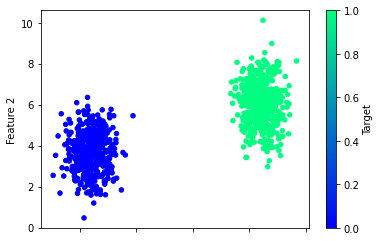

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

#Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"]=y


# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
df.head()

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1


In [4]:
#Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

#Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Complie the Sequential model together and customizae metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 680us/step - loss: 0.7577 - accuracy: 0.5450
Epoch 2/100
24/24 [==============================] - 0s 647us/step - loss: 0.7543 - accuracy: 0.3202
Epoch 3/100
24/24 [==============================] - 0s 639us/step - loss: 0.7453 - accuracy: 0.2266
Epoch 4/100
24/24 [==============================] - 0s 679us/step - loss: 0.7367 - accuracy: 0.2370
Epoch 5/100
24/24 [==============================] - 0s 653us/step - loss: 0.7317 - accuracy: 0.2400
Epoch 6/100
24/24 [==============================] - 0s 693us/step - loss: 0.7277 - accuracy: 0.2519
Epoch 7/100
24/24 [==============================] - 0s 668us/step - loss: 0.7184 - accuracy: 0.3031
Epoch 8/100
24/24 [==============================] - 0s 696us/step - loss: 0.7154 - accuracy: 0.3126
Epoch 9/100
24/24 [==============================] - 0s 718us/step - loss: 0.7124 - accuracy: 0.3211
Epoch 10/100
24/24 [==============================] - 0s 702us/step - loss: 0.7060 - accura

24/24 [==============================] - 0s 611us/step - loss: 0.1423 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 604us/step - loss: 0.1385 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 573us/step - loss: 0.1406 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 642us/step - loss: 0.1326 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 642us/step - loss: 0.1347 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 643us/step - loss: 0.1308 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 627us/step - loss: 0.1296 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 630us/step - loss: 0.1185 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 632us/step - loss: 0.1239 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 636us/step - loss: 0.1159 - accuracy: 

         loss  accuracy
1    0.763441  0.506667
2    0.752448  0.244000
3    0.742924  0.229333
4    0.734895  0.249333
5    0.728155  0.272000
..        ...       ...
96   0.106652  1.000000
97   0.104840  1.000000
98   0.103043  1.000000
99   0.101310  1.000000
100  0.099618  1.000000

[100 rows x 2 columns]


<AxesSubplot:>

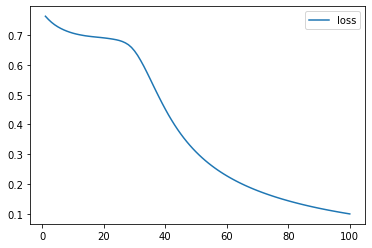

In [12]:
# Create a DF containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history['loss'])+1))
print(history_df)
# Plot the loss
history_df.plot(y='loss')

<AxesSubplot:>

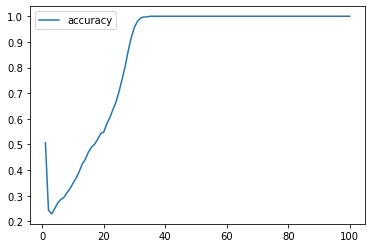

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1019 - accuracy: 1.0000
Loss: 0.10190440714359283, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples = 10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype('int32')

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

     Feature 1  Feature 2  Target
0     0.676217   0.815220       0
1     1.487143  -0.210519       1
2    -1.027709   0.354966       0
3     0.236012   1.025531       0
4     1.856695  -0.042783       1
..         ...        ...     ...
995   0.816425   0.584748       0
996   0.864083   0.195920       0
997   1.865044   0.086256       1
998  -0.836507   0.167338       0
999   0.769625  -0.525292       1

[1000 rows x 3 columns]


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

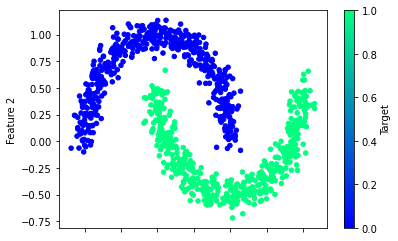

In [16]:
from sklearn.datasets import make_moons

#Creating dummy nonlinear data
X_moons, y_moons, = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1,1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=['Feature 1', 'Feature 2'])
df_moons["Target"]=y_moons
print(df_moons)

#plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y='Feature 2', c='Target', colormap='winter')

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

#Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 967us/step - loss: 0.8067 - accuracy: 0.5733
Epoch 2/100
24/24 [==============================] - 0s 889us/step - loss: 0.7277 - accuracy: 0.5920
Epoch 3/100
24/24 [==============================] - 0s 859us/step - loss: 0.6701 - accuracy: 0.6067
Epoch 4/100
24/24 [==============================] - 0s 899us/step - loss: 0.6291 - accuracy: 0.6227
Epoch 5/100
24/24 [==============================] - 0s 922us/step - loss: 0.5974 - accuracy: 0.6387
Epoch 6/100
24/24 [==============================] - 0s 873us/step - loss: 0.5712 - accuracy: 0.6600
Epoch 7/100
24/24 [==============================] - 0s 896us/step - loss: 0.5499 - accuracy: 0.6693
Epoch 8/100
24/24 [==============================] - 0s 855us/step - loss: 0.5307 - accuracy: 0.6760
Epoch 9/100
24/24 [==============================] - 0s 875us/step - loss: 0.5143 - accuracy: 0.6893
Epoch 10/100
24/24 [==============================] - 0s 912us/step - loss: 0.5000 - accura

24/24 [==============================] - 0s 846us/step - loss: 0.2677 - accuracy: 0.8867
Epoch 82/100
24/24 [==============================] - 0s 862us/step - loss: 0.2672 - accuracy: 0.8853
Epoch 83/100
24/24 [==============================] - 0s 889us/step - loss: 0.2667 - accuracy: 0.8867
Epoch 84/100
24/24 [==============================] - 0s 864us/step - loss: 0.2663 - accuracy: 0.8867
Epoch 85/100
24/24 [==============================] - 0s 891us/step - loss: 0.2659 - accuracy: 0.8880
Epoch 86/100
24/24 [==============================] - 0s 895us/step - loss: 0.2655 - accuracy: 0.8880
Epoch 87/100
24/24 [==============================] - 0s 892us/step - loss: 0.2652 - accuracy: 0.8880
Epoch 88/100
24/24 [==============================] - 0s 868us/step - loss: 0.2647 - accuracy: 0.8880
Epoch 89/100
24/24 [==============================] - 0s 883us/step - loss: 0.2644 - accuracy: 0.8880
Epoch 90/100
24/24 [==============================] - 0s 912us/step - loss: 0.2641 - accuracy: 

<AxesSubplot:>

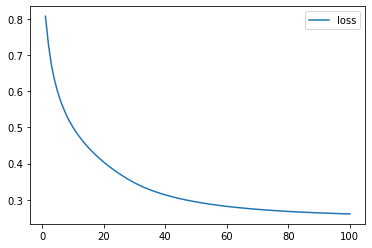

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

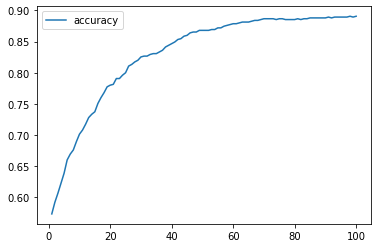

In [20]:
# Plot the loss
history_df.plot(y="accuracy")

In [ ]:
3 generate our